In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [16]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

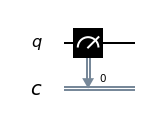

In [4]:
#z-measurement - This hints at the fact that this kind of measurement is not the only one. 
#In fact, it is only one of an infinite number of possible ways to extract a bit from a qubit.
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)
measure_z.draw(output = 'mpl')

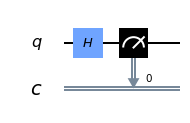

In [5]:
#x - measurement - Another commonly used measurement is the x measurement. It can be performed using the following sequence of gates.
# Later chapters will explain why this sequence of operations performs a new kind of measurement. 
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)
measure_x.draw(output = 'mpl')

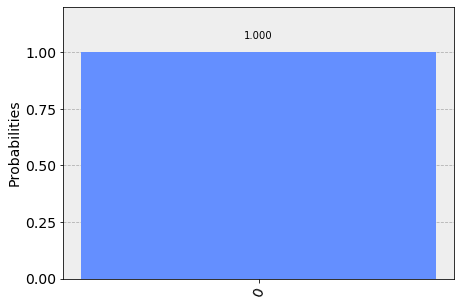

In [7]:
#We will now apply the x_measure and z_measure on a single qubit.

qc_0 = QuantumCircuit(1)
qc = qc_0 + measure_z
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

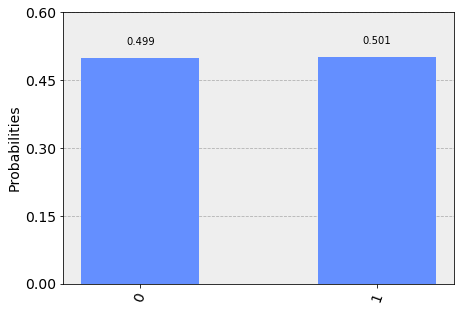

In [10]:
#Note that the reason why the results are not split exactly 50/50 here is because we take samples by repeating the circuit a finite number of times, 
#and so there will always be statistical noise. shots = 1024 in qasm_simulator
qc = qc_0 + measure_x
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

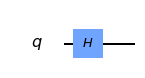

In [11]:
#Instead of a plain qubit, let's now initialise a qubit with a Hadammard gate. You will see the results will flip.
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
qc_plus.draw(output='mpl')

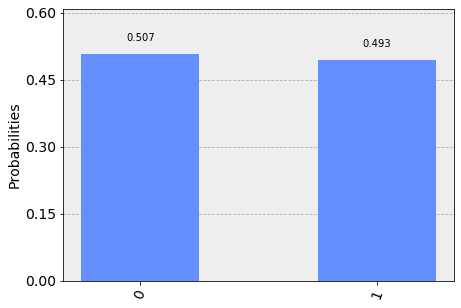

In [14]:
#Lets do a new z and x measurement on this new setup.
qc_z = qc_plus + measure_z
qc_x = qc_plus + measure_x
counts = execute(qc_z,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

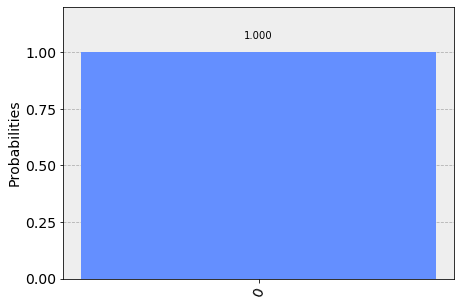

In [15]:
counts = execute(qc_x,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

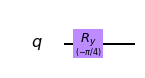

In [24]:
#Now let's create a qubit with an Ry gate. We jus play around with this. Don't know much about it now.
q_y = QuantumCircuit(1)
q_y.ry(-np.pi/4,0)#Yes, you can give qubits values other than 0 and 1.
q_y.draw(output = 'mpl')

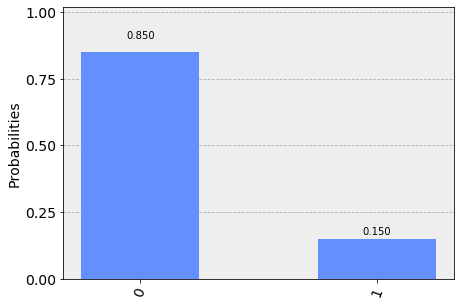

In [21]:
qy1 = q_y + measure_z
qy2 = q_y + measure_x

counts = execute(qy1,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

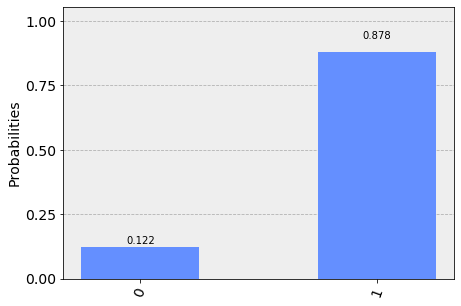

In [23]:
counts = execute(qy2,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)
#Qubits have a limited amount of certainty that they can hold. More on this later.

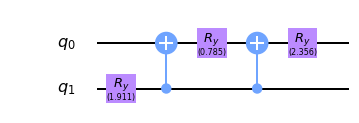

In [25]:
#Einstien Vs Bell - We shall do something called the Hardy Paradox

#Conditions: 
#1. If z measurements are made on both qubits, they never both output 0.
#2. If an x measurement of one qubit outputs 1, a z measurement of the other will output 0.

qc_hardy = QuantumCircuit(2)
qc_hardy.ry(1.911,1)
qc_hardy.cx(1,0)
qc_hardy.ry(0.785,0)
qc_hardy.cx(1,0)
qc_hardy.ry(2.356,0)

qc_hardy.draw(output='mpl')

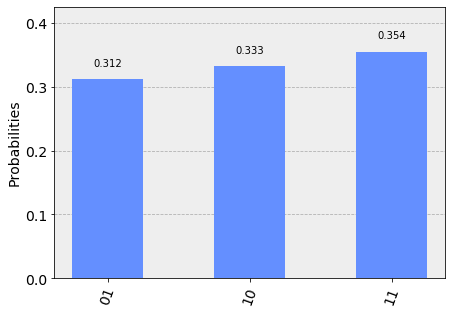

In [28]:
measurements = QuantumCircuit(2,2)
# z measurement on both qubits
measurements.measure(0,0)
measurements.measure(1,1)

qc = qc_hardy + measurements

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)
#The probability of 00 is zero, and so these qubits do indeed satisfy property 1.


Results for two x measurement on qubit 0 and z measurement on qubit 1:


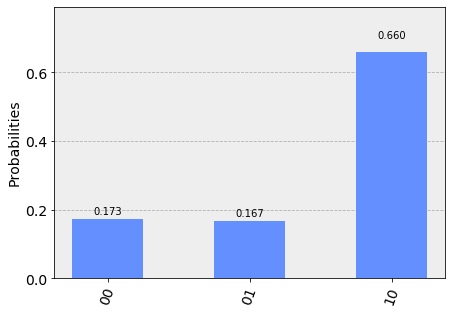

In [29]:
measurements = QuantumCircuit(2,2)
# x measurement on qubit 0
measurements.h(0)
measurements.measure(0,0)
# z measurement on qubit 1
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two x measurement on qubit 0 and z measurement on qubit 1:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

#The probability of 11 is zero. You'll see the same if you swap around the measurements. These qubits therefore also satisfy property 2.


Results for two x measurement on both qubits:


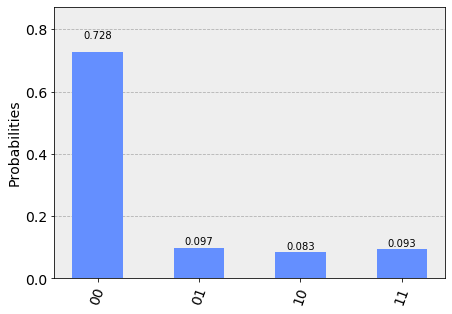

In [30]:
measurements = QuantumCircuit(2,2)
measurements.h(0)
measurements.measure(0,0)
measurements.h(1)
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two x measurement on both qubits:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [ ]:
#Section Takeaway
#A physical system in a definite state can still behave randomly.